<a href="https://colab.research.google.com/github/imgzon3/colab/blob/main/Regression_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀
* 선형 회귀는 크게 정규방정식과 미분으로 방법이 나뉜다.
* 실제로는 SKlearn을 지원하는 LinearRegression 혹은 SGDRegression을 사용한다

## 데이터 목록

In [26]:
import numpy as np

# 테스트 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)
# 0부터 2 사이의 100개의 데이터를 생성함

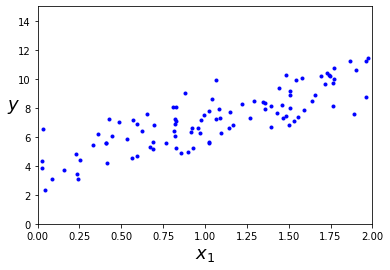

In [27]:
from matplotlib import pyplot as plt

# 테스트 데이터 확인
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가해 준다
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1을 추가합니다.

## 정규방정식

#### 정규방정식으로 계산한 경우

In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[3.67678998],
       [3.27186447]])

In [ ]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.67678998],
       [10.22051892]])

### Sklearn 이용하는 경우

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # coef는 계수, intercept는 절편
# 즉, y = ax + b 알 수 있음
# LinearRegression은 주로 경향을 알아보기 위해 많이 사용함

(array([3.67678998]), array([[3.27186447]]))

In [ ]:
lin_reg.predict(X_new)
# sklearn 이용하여 예측

array([[ 3.67678998],
       [10.22051892]])

## 미분

### 배치 경사 하강법

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[3.67678998],
       [3.27186447]])

In [ ]:
X_new_b.dot(theta)

array([[ 3.67678998],
       [10.22051892]])

### SGD(확률적 경사 하강법) numpy로 구현

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

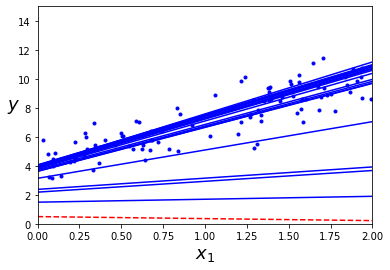

In [25]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼 파라미터

def learning_schedule(t):  # 0.1에서 시작, t가 커질 수록 점점 줄어듬
  return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m): # 1 에폭마다 훈련 샘플 개수만큼 반복 함
    # 여기서부터
    if epoch == 0 and i < 20:
      y_predict = X_new_b.dot(theta)
      style = "b-" if i > 0 else "r--"
      plt.plot(X_new, y_predict, style)
    # 여기까지는 그냥 그래프 그리는데 필요한 것

    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1] # 슬라이싱하여 2D배열 추출함
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

### SGD Sklearn으로 구현

In [29]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.90750683]), array([3.17006179]))

# 다항 회귀
* 고차항의 특성을 지니고 있는 데이터의 경우 사용

## 데이터 목록

In [40]:
# y = 0.5 * x**2 + x + 2 + Noise
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

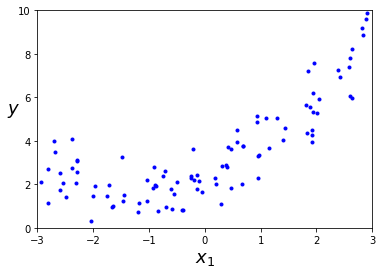

In [41]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

### PolynomialFeatures(sklearn)

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) # 2차항식
X_poly = poly_features.fit_transform(X)
# 일반적으로 sklearn에서 fit은 학습
# transform은 변환한다는 의미
# 즉, fit_transform 은 뭔지는 모르겠지만 학습하고, 변환한다는 의미
X[0]

array([-0.04308249])

In [36]:
X_poly[0]

array([-1.32978911,  1.76833908])

In [37]:
poly_features.get_feature_names()

['x0', 'x0^2']

### LinearRegression + X_poly

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 위에서 전처리된 데이터 입력
lin_reg.intercept_, lin_reg.coef_

(array([2.20174389]), array([[1.02389647, 0.42329455]]))

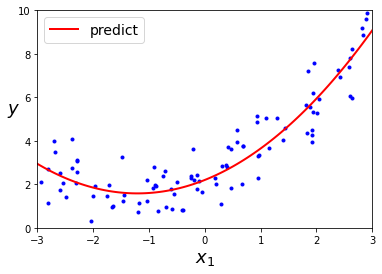

In [45]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

# 그래프 그려보기
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="predict")
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()